<a href="https://colab.research.google.com/github/Sirilak-1447/ImageProcessing/blob/main/Khim_FCN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import cv2
import sys
import torch
import torchvision.transforms as T
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from torchvision.models.segmentation import fcn_resnet50

In [ ]:
folder_path = '/content/drive/MyDrive/Khim_imageclass/'

In [ ]:
#Load the pretrained model
model = fcn_resnet50(pretrained=True)
model.eval()

/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FCN_ResNet50_Weights.COCO_WITH_VOC_LABELS_V1`. You can also use `weights=FCN_ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


FCN(
  (backbone): IntermediateLayerGetter(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequenti

In [ ]:
img = Image.open(folder_path+'heart.jpg')
transform = T.Compose([
    T.ToTensor(),
    T.Resize((256, 256))
])
img_tensor = transform(img).unsqueeze(0)  # Adds a batch dimension

In [ ]:

# Predict
with torch.no_grad():  # Disables gradient computation
    output = model(img_tensor)['out']  # Runs the FCN model
segmentation = torch.argmax(output.squeeze(0), dim=0).detach().cpu().numpy() # Remove batch dimension and select the class with max probability


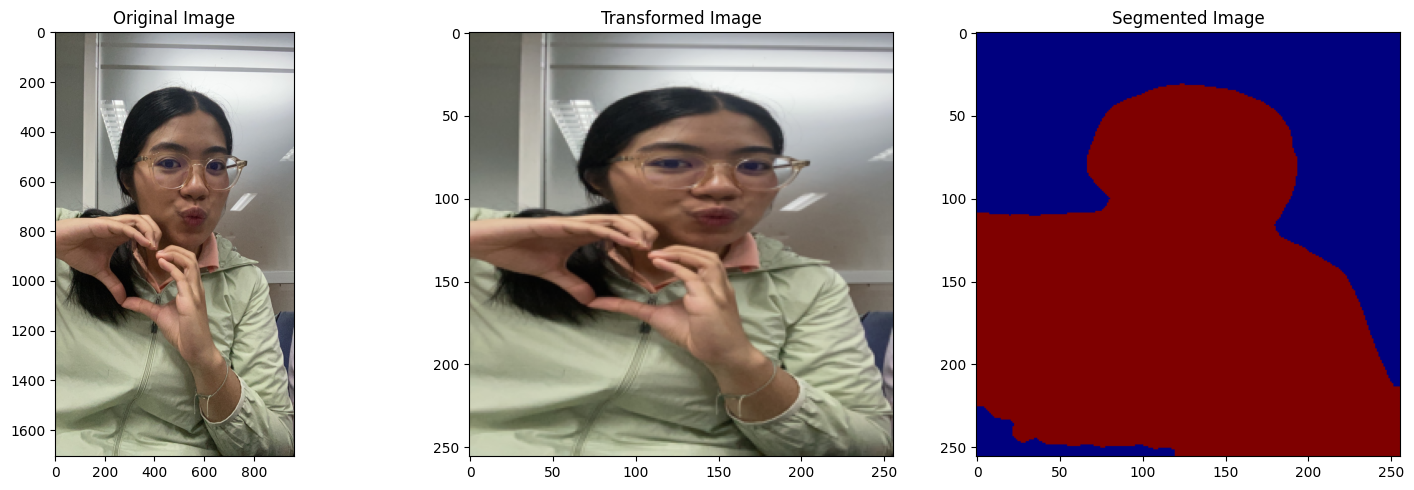

In [ ]:
# Display Result
fig = plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(img)
plt.title('Original Image')

plt.subplot(1, 3, 2)
img_transformed = transform(img)
plt.imshow(img_transformed.permute(1, 2, 0))  # Permute to (H, W, C) for matplotlib
plt.title('Transformed Image')

plt.subplot(1, 3, 3)
plt.imshow(segmentation, cmap='jet')
plt.title('Segmented Image')

plt.tight_layout()  # Adjust layout
plt.savefig(folder_path  + 'Khim_FCN.jpg')  # Save to Google Drive
plt.show()